In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0


In [3]:
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

아래와 같은 수식으로 데이터를 생성한다.
```
y = mx + c
```


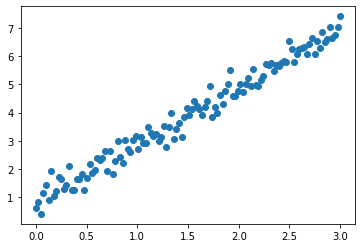

In [17]:
#plt.scatter(x, y, label="input data set")
plt.plot(x, y, 'o')
plt.show()

In [34]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

In [35]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

Here we’re defining the number of epochs as 80 and using a for loop to train the model. Note that we’re printing the epoch count and loss for each epoch using that same for loop. We’ve used 0.12 for learning rate, and we’re calculating the loss in each epoch by calling our loss function inside the for loop as shown below.

In [36]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 500
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    if epoch_count%10 == 0:
        print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()} Weight: {linear_model.Weight.numpy()} Bias: {linear_model.Bias.numpy()}")

Epoch count 0: Loss value: 666.406494140625 Weight: 0.5044622421264648 Bias: 6.09636116027832
Epoch count 10: Loss value: 2.4526429176330566 Weight: 0.4975573420524597 Bias: 3.7333133220672607
Epoch count 20: Loss value: 0.9697253704071045 Weight: 1.0965415239334106 Bias: 2.610185146331787
Epoch count 30: Loss value: 0.41534850001335144 Weight: 1.4627761840820312 Bias: 1.9234751462936401
Epoch count 40: Loss value: 0.2080991119146347 Weight: 1.686701774597168 Bias: 1.5036026239395142
Epoch count 50: Loss value: 0.1306205838918686 Weight: 1.8236156702041626 Bias: 1.2468814849853516
Epoch count 60: Loss value: 0.10165587812662125 Weight: 1.907328486442566 Bias: 1.0899155139923096
Epoch count 70: Loss value: 0.09082765877246857 Weight: 1.9585126638412476 Bias: 0.993942379951477
Epoch count 80: Loss value: 0.0867796242237091 Weight: 1.9898079633712769 Bias: 0.9352619051933289
Epoch count 90: Loss value: 0.08526626974344254 Weight: 2.0089428424835205 Bias: 0.8993830680847168
Epoch count 100

In [22]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(2.039051, 0.84292835)

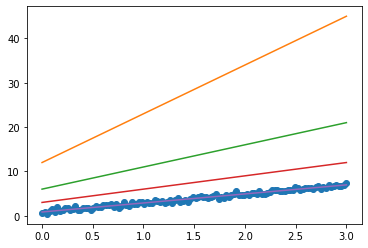

In [43]:
#plt.scatter(x, y, label="input data set")
plt.plot(x, y, 'o')
plt.plot(x, 11 * x + 12)
plt.plot(x, 5 * x + 6)
plt.plot(x, 3 * x + 3)
plt.plot(x, linear_model.Weight.numpy() * x +linear_model.Bias.numpy())
plt.show()

In [27]:
RMSE = loss(y, linear_model(x))

In [28]:
RMSE.numpy()

0.084362775

In [29]:
print(linear_model.Weight.numpy() * 4 +linear_model.Bias.numpy())

8.999132573604584


In [30]:
print(linear_model.Weight.numpy() * 3 +linear_model.Bias.numpy())

6.960081517696381


In [32]:
print(11 * 3.5 +12)

50.5
